In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import re

In [2]:
data = pd.read_csv('./spam_or_not_spam.csv')

In [3]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d', ' ', text)  # Remove numbers
    text = text.lower()              # Convert to lowercase
    text = re.sub(r'\s+', ' ', text) # Remove extra spaces
    return text

In [4]:
data['email'] = data['email'].apply(lambda x: clean_text(str(x)))

In [5]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(data['email']).toarray()
y = data['label']  # Target variable

In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [8]:
# Predict posterior probabilities
y_prob = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [9]:
# Calculate prior probabilities
prior_prob_spam = np.mean(y_train)
prior_prob_non_spam = 1 - prior_prob_spam

In [10]:
print(f"Prior Probability of Spam: {prior_prob_spam:.2f}")
print(f"Prior Probability of Not Spam: {prior_prob_non_spam:.2f}")

Prior Probability of Spam: 0.16
Prior Probability of Not Spam: 0.84


In [11]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.22%


In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[745   0]
 [ 34 121]]


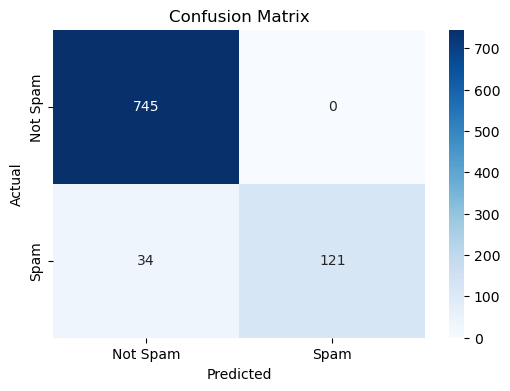

In [13]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

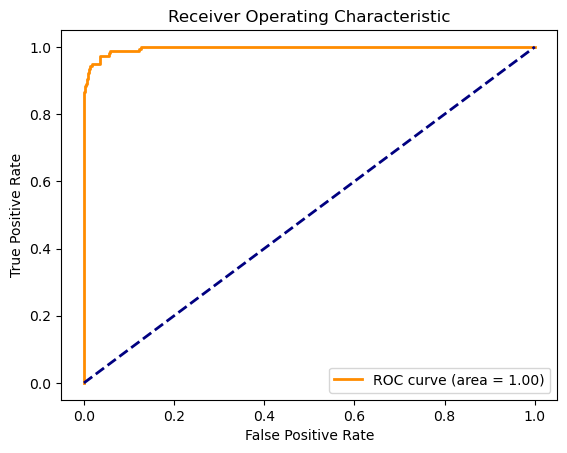

In [14]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
# Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 1.00
Recall: 0.78
F1 Score: 0.88


In [16]:
# Feature Importance
feature_names = vectorizer.get_feature_names_out()
class_probs = model.feature_log_prob_
top_spam_words = np.argsort(class_probs[1])[-10:]
top_non_spam_words = np.argsort(class_probs[0])[-10:]
print("Top Spam Words:", [feature_names[i] for i in top_spam_words])
print("Top Non-Spam Words:", [feature_names[i] for i in top_non_spam_words])

Top Spam Words: ['url', 'for', 'of', 'and', 'your', 'the', 'you', 'to', 'hyperlink', 'number']
Top Non-Spam Words: ['that', 'in', 'is', 'it', 'and', 'of', 'to', 'url', 'the', 'number']


In [17]:
# Cross-Validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores) * 100:.2f}%")

Cross-Validation Accuracy: 96.70%
